# KNN


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

from assignment_2.digits_classifiers.model import Dataset
from assignment_2.digits_classifiers.classifiers import NaiveBayes
from assignment_2.digits_classifiers.io import read_datasets

## Import dataset

In [2]:
data = read_datasets()

2022-12-23 09:26:42.120 | INFO     | assignment_2.digits_classifiers.io:read_datasets:46 - Reading datasets


In [3]:
X, y = data

In [4]:
X, _, y, _ = train_test_split(X, y, test_size=0.99)

## Train Test split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)

In [6]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
data = Dataset(x=X, y=y)
train = Dataset(x=X_train, y=y_train)
test = Dataset(x=X_test, y=y_test)

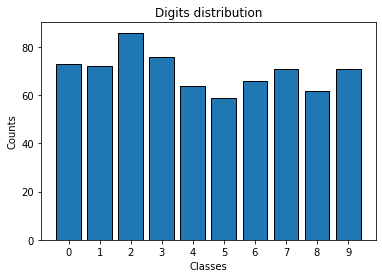

In [8]:
data.digit_distribution()

## Plotting the mean distribution

2022-12-23 09:26:47.287 | INFO     | assignment_2.digits_classifiers.utils:plot_digit:77 - Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_2\digits_classifiers\images\0_mean
2022-12-23 09:26:47.521 | INFO     | assignment_2.digits_classifiers.utils:plot_digit:77 - Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_2\digits_classifiers\images\1_mean
2022-12-23 09:26:47.756 | INFO     | assignment_2.digits_classifiers.utils:plot_digit:77 - Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_2\digits_classifiers\images\2_mean
2022-12-23 09:26:47.990 | INFO     | assignment_2.digits_classifiers.utils:plot_digit:77 - Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_2\digits_classifiers\images\3_mean
2022-12-23 09:26:48.224 | INFO     | assignment_2.digits_classifiers.utils:plot_digit:77 - Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_2\digits_classifiers\images\4_mean
2022-12-23 09:26:48.459 | INFO     | assignment_2.

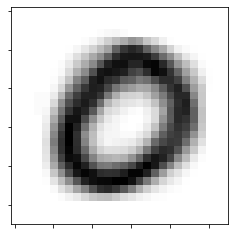

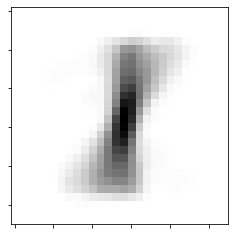

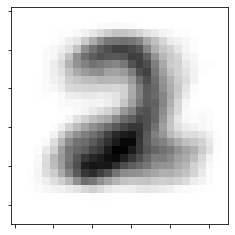

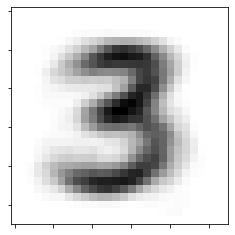

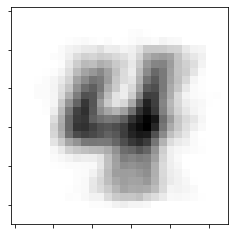

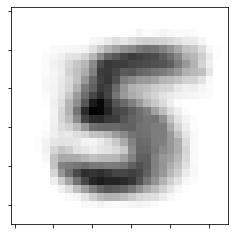

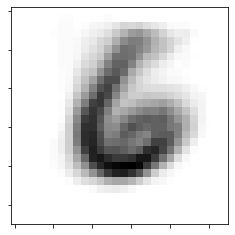

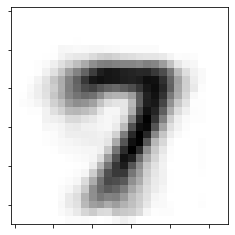

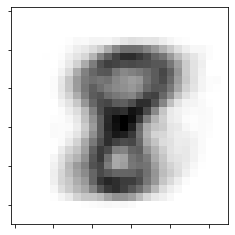

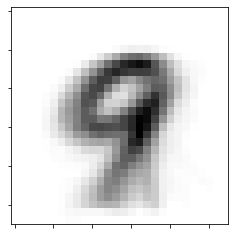

In [9]:
import numpy as np

from assignment_2.digits_classifiers.utils import chunks, plot_digit

def mean_distribution():
    for i in range(10):
        pixels = [(np.array(X.loc[y==i]))[:, c].mean() for c in range(len(X.columns))]
        chunks_ = chunks(lst=pixels, n=28)
        plot_digit(pixels=chunks_, save=True, file_name=f"{i}_mean")

mean_distribution()

## Modelling bayes

In [10]:
nb = NaiveBayes(train=train, test=test)

In [11]:
%%time
nb.train()

C:\Users\user\Documents\GitHub\AI_assignments\assignment_2\digits_classifiers\classifiers.py:302: RuntimeWarning: invalid value encountered in double_scalars
  k = mean * (1-mean) / var - 1  # K = ( E[X] * (1 - E[X]) / Var[X] ) - 1


Wall time: 234 ms


In [12]:
%%time
nb.predict()

 > 0.000000
 > 42.857143
 > 85.714286
Wall time: 37.2 s


In [13]:
nb.accuracy

0.7571428571428571

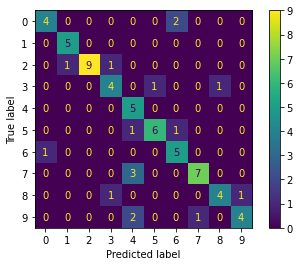

In [14]:
nb.confusion_matrix()

## Fool data

In [40]:
from assignment_2.digits_classifiers.io import read_fool_dataset


def get_one_class_dataset() -> pd.DataFrame:
    return pd.concat(
        [ X.loc[y==i].head(1) for i in range(len(set(y))) ]
    )

def get_with_fool_dataset() -> pd.DataFrame:
    with_fool = pd.concat([
        get_one_class_dataset(),
        read_fool_dataset()
    ])
    return with_fool.reset_index(drop=True)

with_fools = np.array(get_with_fool_dataset())

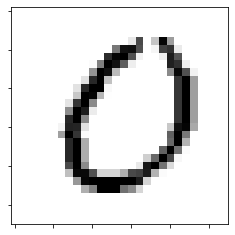

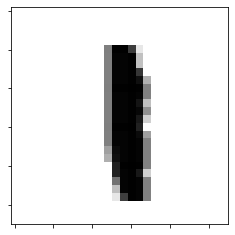

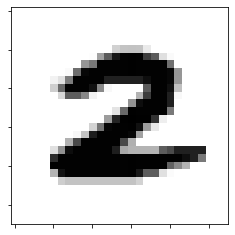

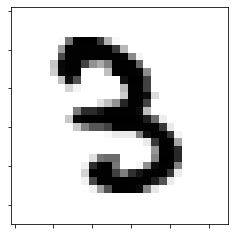

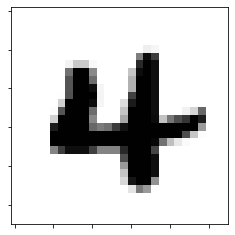

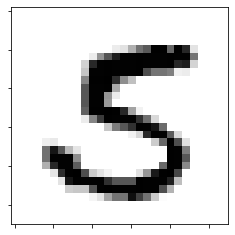

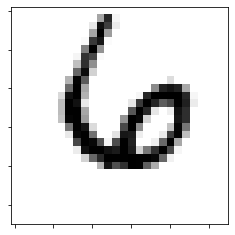

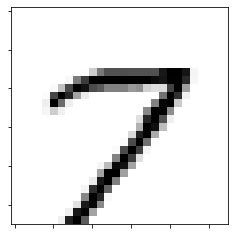

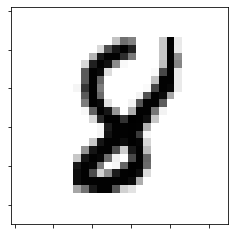

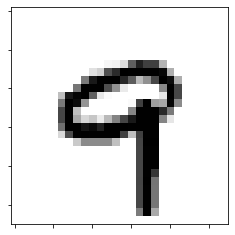

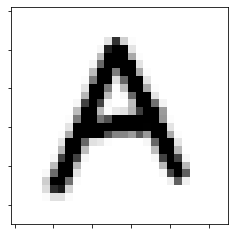

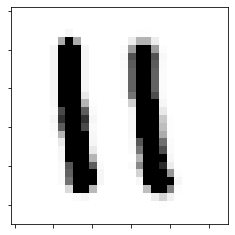

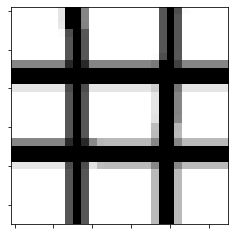

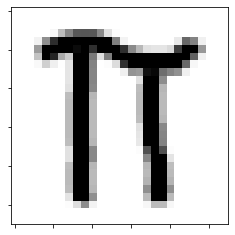

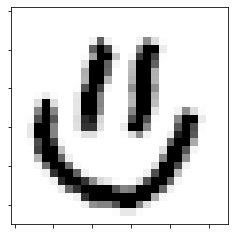

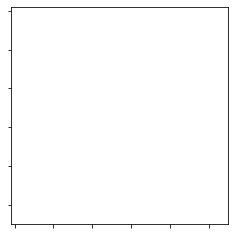

In [73]:
def plot_with_fools():
    for i in range(with_fools.shape[0]):
        chunks_ = chunks(lst=with_fools[i], n=28)
        plot_digit(pixels=chunks_)

plot_with_fools()

In [48]:
nb.estimator._labels_products(with_fools[0])

[(7.797330904654582e-213, 0),
 (0.0, 1),
 (2.7774413093093e-311, 2),
 (2.03076991863e-313, 3),
 (9.398653838401639e-294, 4),
 (0.0, 5),
 (8.998282292915601e-297, 6),
 (0.0, 7),
 (7.568455579868031e-297, 8),
 (4.996062059279508e-308, 9)]

In [51]:
products = [{ label: prod for prod, label in nb.estimator._labels_products(with_fools[i])} for i in range(len(with_fools))]

In [55]:
labels = list(products[0].keys())
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [61]:
as_dict = {
    l : [product[l] for product in products]
    for l in labels
}

In [63]:
df = pd.DataFrame(as_dict)

In [67]:
df

,0,1,2,3,4,5,6,7,8,9
0,7.797331e-213,0.000000e+00,2.777441e-311,2.030770e-313,9.398654e-294,0.000000e+00,8.998282e-297,0.000000e+00,7.568456e-297,4.996062e-308
1,0.000000e+00,1.179479e-128,3.185900e-173,6.725852e-170,3.164268e-187,7.122032e-176,3.349741e-173,7.177519e-177,2.179345e-157,0.000000e+00
2,0.000000e+00,0.000000e+00,3.690505e-239,1.732685e-286,0.000000e+00,4.306943e-285,0.000000e+00,0.000000e+00,1.423051e-252,1.956128e-305
3,0.000000e+00,0.000000e+00,7.406444e-261,6.133265e-220,1.940229e-295,6.496957e-252,1.476453e-280,0.000000e+00,4.292160e-261,0.000000e+00
4,0.000000e+00,0.000000e+00,1.240182e-268,1.821621e-289,2.292379e-195,8.257110e-262,0.000000e+00,1.231317e-276,0.000000e+00,1.187731e-232
5,0.000000e+00,0.000000e+00,2.497446e-303,4.926425e-281,0.000000e+00,2.475885e-255,0.000000e+00,0.000000e+00,2.660941e-286,0.000000e+00
6,0.000000e+00,0.000000e+00,8.170261e-259,4.678237e-309,2.369091e-224,1.230520e-286,1.601984e-243,5.817105e-270,2.808975e-266,0.000000e+00
7,1.027966e-236,0.000000e+00,4.808630e-223,2.270672e-260,0.000000e+00,6.369368e-229,4.262845e-237,1.380186e-177,2.757708e-233,1.059361e-207
8,0.000000e+00,3.718873e-289,2.570304e-230,6.105493e-234,2.614590e-245,1.018262e-222,1.861299e-249,2.713940e-247,6.421355e-195,0.000000e+00
9,0.000000e+00,0.000000e+00,3.939801e-249,1.487370e-282,1.238453e-201,8.543918e-243,3.610367e-236,1.627825e-237,0.000000e+00,8.000964e-196


In [80]:
df.set_index([[str(i) for i in range(10)] + ['A', 'eleven', 'grid', 'pi', 'smile', 'empty']], inplace=True)

In [81]:
df

,0,1,2,3,4,5,6,7,8,9
0,7.797331e-213,0.000000e+00,2.777441e-311,2.030770e-313,9.398654e-294,0.000000e+00,8.998282e-297,0.000000e+00,7.568456e-297,4.996062e-308
1,0.000000e+00,1.179479e-128,3.185900e-173,6.725852e-170,3.164268e-187,7.122032e-176,3.349741e-173,7.177519e-177,2.179345e-157,0.000000e+00
2,0.000000e+00,0.000000e+00,3.690505e-239,1.732685e-286,0.000000e+00,4.306943e-285,0.000000e+00,0.000000e+00,1.423051e-252,1.956128e-305
3,0.000000e+00,0.000000e+00,7.406444e-261,6.133265e-220,1.940229e-295,6.496957e-252,1.476453e-280,0.000000e+00,4.292160e-261,0.000000e+00
4,0.000000e+00,0.000000e+00,1.240182e-268,1.821621e-289,2.292379e-195,8.257110e-262,0.000000e+00,1.231317e-276,0.000000e+00,1.187731e-232
5,0.000000e+00,0.000000e+00,2.497446e-303,4.926425e-281,0.000000e+00,2.475885e-255,0.000000e+00,0.000000e+00,2.660941e-286,0.000000e+00
6,0.000000e+00,0.000000e+00,8.170261e-259,4.678237e-309,2.369091e-224,1.230520e-286,1.601984e-243,5.817105e-270,2.808975e-266,0.000000e+00
7,1.027966e-236,0.000000e+00,4.808630e-223,2.270672e-260,0.000000e+00,6.369368e-229,4.262845e-237,1.380186e-177,2.757708e-233,1.059361e-207
8,0.000000e+00,3.718873e-289,2.570304e-230,6.105493e-234,2.614590e-245,1.018262e-222,1.861299e-249,2.713940e-247,6.421355e-195,0.000000e+00
9,0.000000e+00,0.000000e+00,3.939801e-249,1.487370e-282,1.238453e-201,8.543918e-243,3.610367e-236,1.627825e-237,0.000000e+00,8.000964e-196
